C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step  


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:71: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: 0.7833370566368103 | D accuracy: 38.671875] [G loss: [array(0.7570131, dtype=float32), array(0.7570131, dtype=float32), array(0.3984375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


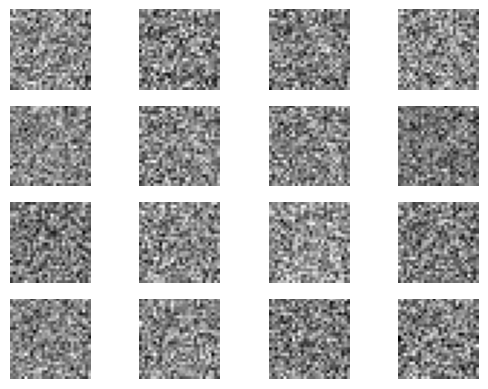

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1 [D loss: 0.7784095406532288 | D accuracy: 36.26301884651184] [G loss: [array(0.7708472, dtype=float32), array(0.7708472, dtype=float32), array(0.35546875, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2 [D loss: 0.7771854400634766 | D accuracy: 34.296876192092896] [G loss: [array(0.77305007, dtype=float32), array(0.77305007, dtype=float32), array(0.3359375, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3 [D loss: 0.7822964787483215 | D accuracy: 30.84542453289032] [G loss: [array(0.78094065, dtype=float32), array(0.78094065, dtype=float32), array(0.29101562, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4 [D loss: 0.7874776124954224 | D accuracy: 28.029513359069824] [G loss: [array(0.7881036, dtype=float32), array(0.7881036, dtype=float32), array(0.2671875, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
5 [D loss: 0.7929342985153198 | D accuracy: 25.727981328964233] [G loss: [array(0.795163, dtype=float32), arra

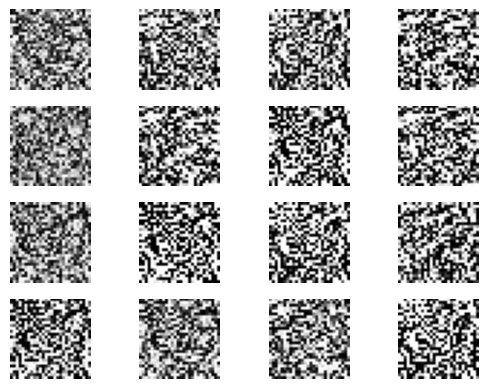

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1001 [D loss: 3.942111015319824 | D accuracy: 14.048853516578674] [G loss: [array(3.9432974, dtype=float32), array(3.9432974, dtype=float32), array(0.14045347, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1002 [D loss: 3.9429404735565186 | D accuracy: 14.04886543750763] [G loss: [array(3.9441273, dtype=float32), array(3.9441273, dtype=float32), array(0.14045364, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1003 [D loss: 3.9437007904052734 | D accuracy: 14.052772521972656] [G loss: [array(3.9448242, dtype=float32), array(3.9448242, dtype=float32), array(0.14049272, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1004 [D loss: 3.9444096088409424 | D accuracy: 14.055891335010529] [G loss: [array(3.945552, dtype=float32), array(3.945552, dtype=float32), array(0.14052394, dtype=float32)]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1005 [D loss: 3.9451446533203125 | D accuracy: 14.059005677700043] [G loss: [array(3.9462857, dtype=fl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Sequential


In [ ]:

# Define the Generator
def build_generator():
    model = Sequential()
    modeol.add(Conv
    model.add(Dense(128, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dense(784, activation='tanh'))  # Assuming output is 28x28 image flattened
    model.add(Reshape((28, 28, 1)))  # Reshape to image shape
    return model

# Define the Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define the GAN
def build_gan(generator, discriminator):
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Compile the Models
def compile_models(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Keep Discriminator weights constant when training GAN
    discriminator.trainable = False
    
    gan = build_gan(generator, discriminator)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return gan

# Train the GAN
def train_gan(epochs, batch_size=128):
    # Load and preprocess data
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = (X_train - 127.5) / 127.5  # Normalize to [-1, 1]
    X_train = np.expand_dims(X_train, axis=-1)
    
    generator = build_generator()
    discriminator = build_discriminator()
    gan = compile_models(generator, discriminator)

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]
        fake_images = generator.predict(np.random.randn(batch_size, 100))
        
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        # Train Generator
        g_loss = gan.train_on_batch(np.random.randn(batch_size, 100), np.ones((batch_size, 1)))
        
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
        
        if epoch % 1000 == 0:
            # Generate and save images for visualization
            sample_images = generator.predict(np.random.randn(16, 100))
            sample_images = 0.5 * sample_images + 0.5  # Rescale to [0, 1]
            
            fig, axs = plt.subplots(4, 4)
            cnt = 0
            for i in range(4):
                for j in range(4):
                    axs[i, j].imshow(sample_images[cnt, :, :, 0], cmap='gray')
                    axs[i, j].axis('off')
                    cnt += 1
            plt.show()

In [ ]:
# Run Training
train_gan(epochs=10000, batch_size=64)